In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('/Users/sera/Downloads/Python-Data-Science-and-Machine-Learning-Bootcamp/Machine Learning Sections/Logistic-Regression/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


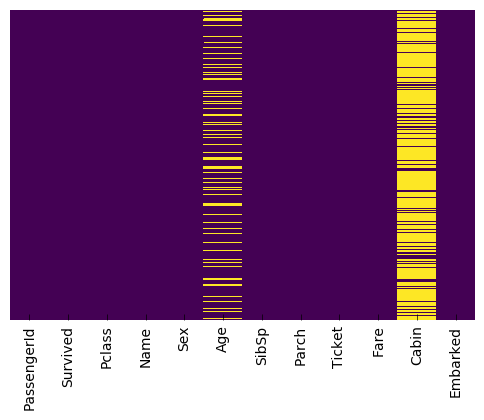

In [8]:
sns.heatmap(train.isnull(), yticklabels = False, cbar= False, cmap= 'viridis')

In [17]:
sns.set_style('whitegrid')

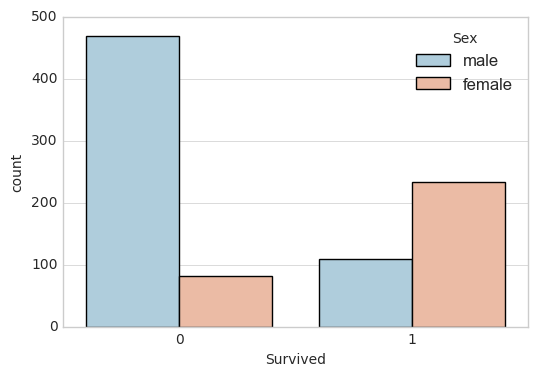

In [26]:
sns.countplot(x= 'Survived',hue = 'Sex', data = train, palette= 'RdBu_r')

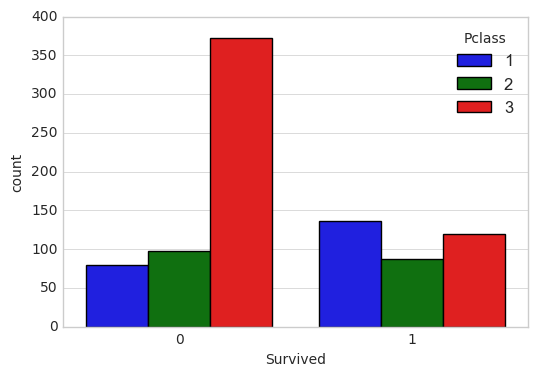

In [27]:
sns.countplot(x= 'Survived', hue= 'Pclass', data= train)

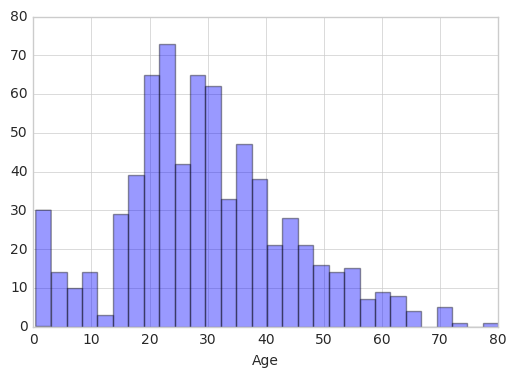

In [31]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

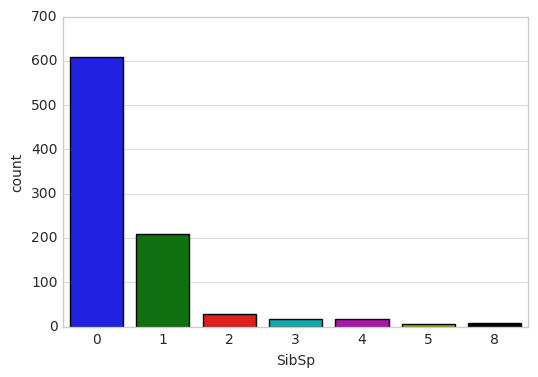

In [33]:
sns.countplot(x= 'SibSp', data= train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a479860>]], dtype=object)

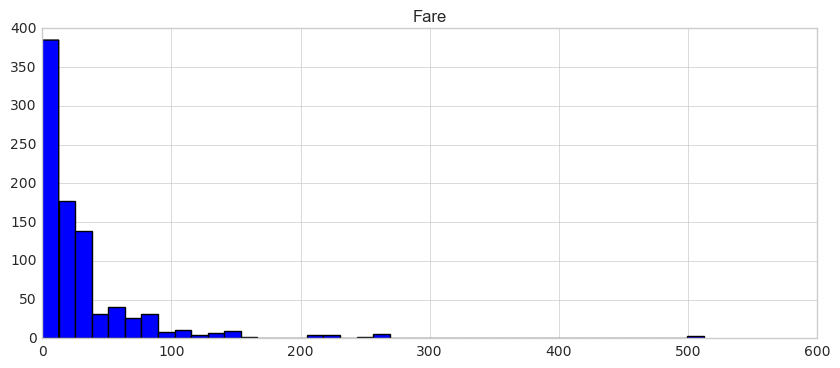

In [39]:
train.hist('Fare', bins = 40, figsize= (10,4))

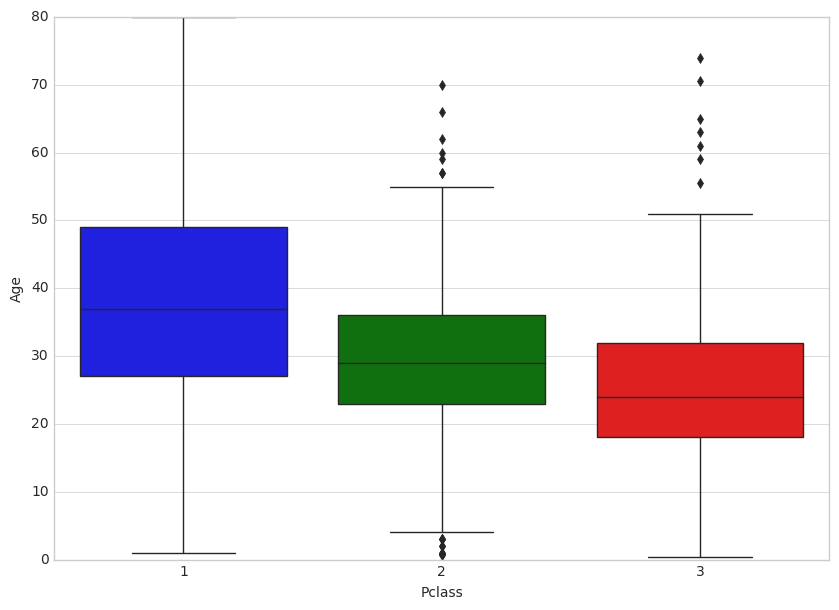

In [46]:
plt.figure(figsize = (10,7))
sns.boxplot(x= 'Pclass', y='Age', data= train)

In [51]:
def impute_age (cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
            return Age
        

In [52]:
train['Age']= train[['Age', 'Pclass']].apply(impute_age,axis = 1)

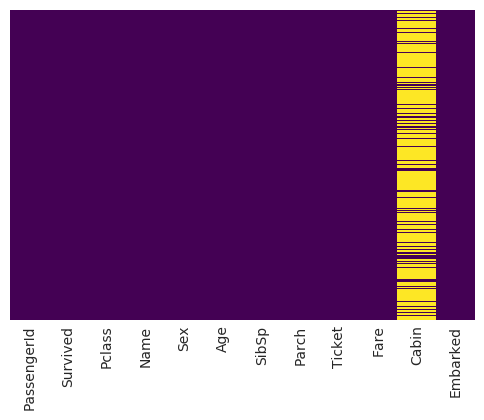

In [57]:
sns.heatmap(train.isnull(), yticklabels= False, cbar= False,cmap= 'viridis')

In [58]:
train.drop('Cabin', axis= 1, inplace= True)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


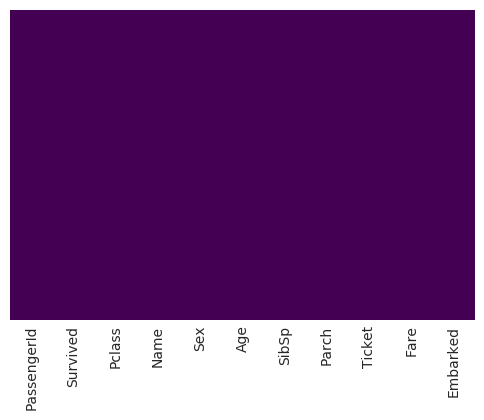

In [62]:
sns.heatmap(train.isnull(), yticklabels = False, cbar= False, cmap= 'viridis')

In [65]:
sex = pd.get_dummies(train['Sex'],drop_first= True)

In [69]:
embark = pd.get_dummies(train['Embarked'],drop_first= True)

In [71]:
train = pd.concat([train,sex, embark],axis= 1)

In [75]:
train.drop(['Sex','Name','Embarked','Ticket'],axis= 1,inplace= True)

In [76]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [78]:
X = train.drop('Survived',axis= 1)
y= train['Survived']

In [79]:
from sklearn.cross_validation import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logmodel = LogisticRegression()

In [84]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
predictions = logmodel.predict(X_test)

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.77      0.88      0.82       154
          1       0.79      0.64      0.71       114

avg / total       0.78      0.78      0.77       268



In [ ]:
Thank You!